In [1]:
pip install numpy==1.21.6


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lifelines


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Non-Genomic Data

In [132]:
import pandas as pd

non_genome = pd.read_excel("20220809 TARCC Data for Dr Broussard.xlsx")
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,CCR_YES,CCR_CL_IMPRESS_CODE,CCR_MCIAMEM,CCR_MCIAPLUS,CCR_MCIAPLAN,...,RBM_VEGF,RBM_VWF,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,0,,,,,,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,0,,,,,,...,531,40,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,0,,,,,,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,0,,,,,,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,0,,,,,,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,1,,4,,,,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,1,,4,,,,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,1,,4,,,,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,1,,4,,,,...,,,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


### Data Processing and Cleaning

In [133]:
ccr_columns = []
for col in non_genome.columns:
    if col.startswith("CCR"):
        ccr_columns.append(col)
ccr_columns

['CCR',
 'CCR_YES',
 'CCR_CL_IMPRESS_CODE',
 'CCR_MCIAMEM',
 'CCR_MCIAPLUS',
 'CCR_MCIAPLAN',
 'CCR_MCIAPATT',
 'CCR_MCIAPEX',
 'CCR_MCIAPVIS',
 'CCR_MCINON1',
 'CCR_MCIN1LAN',
 'CCR_MCIN1ATT',
 'CCR_MCIN1EX',
 'CCR_MCIN1VIS',
 'CCR_MCINON2',
 'CCR_MCIN2LAN',
 'CCR_MCIN2ATT',
 'CCR_MCIN2EX',
 'CCR_MCIN2VIS',
 'CCR_YES_NOTES']

In [134]:
non_genome.drop(labels=ccr_columns, axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,RBM_VEGF,RBM_VWF,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,531,40,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,,,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [135]:
a41_columns = []
for col in non_genome.columns:
    if col.startswith("A41"):
        a41_columns.append(col)
a41_columns

['A41_PMA',
 'A41_PMAF',
 'A41_PMAFU',
 'A41_PMAP',
 'A41_PMAPF',
 'A41_PMAPFU',
 'A41_PMAPREV',
 'A41_PMART',
 'A41_PMAS',
 'A41_PMASTDA',
 'A41_PMASTMO',
 'A41_PMASTYR',
 'A41_PMASU',
 'A41_PMB',
 'A41_PMBF',
 'A41_PMBFU',
 'A41_PMBP',
 'A41_PMBPF',
 'A41_PMBPFU',
 'A41_PMBPREV',
 'A41_PMBRT',
 'A41_PMBS',
 'A41_PMBSTDA',
 'A41_PMBSTMO',
 'A41_PMBSTYR',
 'A41_PMBSU']

In [136]:
non_genome.drop(labels=a41_columns, axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,RBM_VEGF,RBM_VWF,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,531,40,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,,,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [137]:
a44_columns = []
for col in non_genome.columns:
    if col.startswith("A44"):
        a44_columns.append(col)
a44_columns

['A44_DRG_TRIAL',
 'A44_DRG_TRIALX',
 'A44_SSA',
 'A44_SSAF',
 'A44_SSAFU',
 'A44_SSAPREV',
 'A44_SSART',
 'A44_SSAS',
 'A44_SSASTDA',
 'A44_SSASTMO',
 'A44_SSASTYR',
 'A44_SSASU',
 'A44_SSB',
 'A44_SSBF',
 'A44_SSBFU',
 'A44_SSBPREV',
 'A44_SSBRT',
 'A44_SSBS',
 'A44_SSBSTDA',
 'A44_SSBSTMO',
 'A44_SSBSTYR',
 'A44_SSBSU',
 'A44_SSC',
 'A44_SSCF',
 'A44_SSCFU',
 'A44_SSCPREV',
 'A44_SSCRT',
 'A44_SSCS',
 'A44_SSCSTDA',
 'A44_SSCSTMO',
 'A44_SSCSTYR',
 'A44_SSCSU',
 'A44_SSD',
 'A44_SSDF',
 'A44_SSDFU',
 'A44_SSDPREV',
 'A44_SSDRT',
 'A44_SSDS',
 'A44_SSDSTDA',
 'A44_SSDSTMO',
 'A44_SSDSTYR',
 'A44_SSDSU',
 'A44_SSE',
 'A44_SSEF',
 'A44_SSEFU',
 'A44_SSEPREV',
 'A44_SSERT',
 'A44_SSES',
 'A44_SSESTDA',
 'A44_SSESTMO',
 'A44_SSESTYR',
 'A44_SSESU',
 'A44_SSF',
 'A44_SSFF',
 'A44_SSFFU',
 'A44_SSFPREV',
 'A44_SSFRT',
 'A44_SSFS',
 'A44_SSFSTDA',
 'A44_SSFSTMO',
 'A44_SSFSTYR',
 'A44_SSFSU']

In [138]:
non_genome.drop(labels=a44_columns, axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,RBM_VEGF,RBM_VWF,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,531,40,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,,,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [139]:
non_genome['RBM_Rule_Based_Medicine']

0        0
1        1
2        1
3        1
4        1
        ..
14650    0
14651    0
14652    0
14653    0
14654    0
Name: RBM_Rule_Based_Medicine, Length: 14655, dtype: int64

In [140]:
non_genome.drop(labels=['RBM_Rule_Based_Medicine', 'RBM_Rule_Based_Medicine_tp'], axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,RBM_VEGF,RBM_VWF,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,531,40,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,,,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,,,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,,,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [141]:
import numpy as np 

non_genome.replace(" ", np.nan, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,RBM_VEGF,RBM_VWF,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,NaN,NaN,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,531.0,40.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,NaN,NaN,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,NaN,NaN,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,NaN,NaN,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,NaN,NaN,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,NaN,NaN,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,NaN,NaN,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,NaN,NaN,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [142]:
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))

A1_HISPANIC_TYPE 9574
A1_HISPORX 14645
A1_RACE 9861
A1_RACESEC 9874
A42_VEA 13230
A42_VEAF 13718
A42_VEAFU 3428
A42_VEART 14148
A42_VEAS 13753
A43_ADA 10359
A43_ADAENDDA 14358
A43_ADAENDMO 14232
A43_ADAENDYR 14165
A43_ADART 13916
A43_ADASTDA 13762
A43_ADASTMO 13289
A43_ADASTYR 12936
A43_ADB 11658
A43_ADBRT 14239
A43_ADBSTDA 13903
A43_ADBSTMO 13586
A43_ADBSTYR 13355
A43_ADC 14001
A43_ADCENDDA 14489
A43_ADCENDMO 14442
A43_ADCENDYR 14431
A43_ADCRT 14630
A43_ADCSTDA 14341
A43_ADCSTMO 14253
A43_ADCSTYR 14212
A43_ADD 14373
A43_ADDENDDA 14569
A43_ADDENDMO 14547
A43_ADDENDYR 14538
A43_ADDRT 14653
A43_ADDSTDA 14499
A43_ADDSTMO 14463
A43_ADDSTYR 14448
A43_ADE 14516
A43_ADEENDDA 14614
A43_ADEENDMO 14602
A43_ADEENDYR 14602
A43_ADERT 14654
A43_ADESTDA 14573
A43_ADESTMO 14556
A43_ADESTYR 14550
A43_ADF 14585
A43_ADFENDDA 14637
A43_ADFENDMO 14632
A43_ADFENDYR 14632
A43_ADFRT 14655
A43_ADFSTDA 14611
A43_ADFSTMO 14602
A43_ADFSTYR 14600
A5_ABUSX 14606
A5_CBOTHRX 14487
A5_CHRON_OTHX 14482
A5_CVOTHRX 12529

In [143]:
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null > 10000: 
        print(col+" "+str(num_null))

A1_HISPORX 14645
A42_VEA 13230
A42_VEAF 13718
A42_VEART 14148
A42_VEAS 13753
A43_ADA 10359
A43_ADAENDDA 14358
A43_ADAENDMO 14232
A43_ADAENDYR 14165
A43_ADART 13916
A43_ADASTDA 13762
A43_ADASTMO 13289
A43_ADASTYR 12936
A43_ADB 11658
A43_ADBRT 14239
A43_ADBSTDA 13903
A43_ADBSTMO 13586
A43_ADBSTYR 13355
A43_ADC 14001
A43_ADCENDDA 14489
A43_ADCENDMO 14442
A43_ADCENDYR 14431
A43_ADCRT 14630
A43_ADCSTDA 14341
A43_ADCSTMO 14253
A43_ADCSTYR 14212
A43_ADD 14373
A43_ADDENDDA 14569
A43_ADDENDMO 14547
A43_ADDENDYR 14538
A43_ADDRT 14653
A43_ADDSTDA 14499
A43_ADDSTMO 14463
A43_ADDSTYR 14448
A43_ADE 14516
A43_ADEENDDA 14614
A43_ADEENDMO 14602
A43_ADEENDYR 14602
A43_ADERT 14654
A43_ADESTDA 14573
A43_ADESTMO 14556
A43_ADESTYR 14550
A43_ADF 14585
A43_ADFENDDA 14637
A43_ADFENDMO 14632
A43_ADFENDYR 14632
A43_ADFRT 14655
A43_ADFSTDA 14611
A43_ADFSTMO 14602
A43_ADFSTYR 14600
A5_ABUSX 14606
A5_CBOTHRX 14487
A5_CHRON_OTHX 14482
A5_CVOTHRX 12529
A5_NCOTHRX 13877
A5_PSYCDISX 13542
A5_QUITSMOK 11465
A5_SEIZURES 

In [144]:
null_cols = []

for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null > 10000: 
        null_cols.append(col)
null_cols

['A1_HISPORX',
 'A42_VEA',
 'A42_VEAF',
 'A42_VEART',
 'A42_VEAS',
 'A43_ADA',
 'A43_ADAENDDA',
 'A43_ADAENDMO',
 'A43_ADAENDYR',
 'A43_ADART',
 'A43_ADASTDA',
 'A43_ADASTMO',
 'A43_ADASTYR',
 'A43_ADB',
 'A43_ADBRT',
 'A43_ADBSTDA',
 'A43_ADBSTMO',
 'A43_ADBSTYR',
 'A43_ADC',
 'A43_ADCENDDA',
 'A43_ADCENDMO',
 'A43_ADCENDYR',
 'A43_ADCRT',
 'A43_ADCSTDA',
 'A43_ADCSTMO',
 'A43_ADCSTYR',
 'A43_ADD',
 'A43_ADDENDDA',
 'A43_ADDENDMO',
 'A43_ADDENDYR',
 'A43_ADDRT',
 'A43_ADDSTDA',
 'A43_ADDSTMO',
 'A43_ADDSTYR',
 'A43_ADE',
 'A43_ADEENDDA',
 'A43_ADEENDMO',
 'A43_ADEENDYR',
 'A43_ADERT',
 'A43_ADESTDA',
 'A43_ADESTMO',
 'A43_ADESTYR',
 'A43_ADF',
 'A43_ADFENDDA',
 'A43_ADFENDMO',
 'A43_ADFENDYR',
 'A43_ADFRT',
 'A43_ADFSTDA',
 'A43_ADFSTMO',
 'A43_ADFSTYR',
 'A5_ABUSX',
 'A5_CBOTHRX',
 'A5_CHRON_OTHX',
 'A5_CVOTHRX',
 'A5_NCOTHRX',
 'A5_PSYCDISX',
 'A5_QUITSMOK',
 'A5_SEIZURES',
 'A5_SMOKYRS',
 'A5_STROK1YR',
 'A5_STROK2YR',
 'A5_STROK3YR',
 'A5_STROK4YR',
 'A5_STROK5YR',
 'A5_STROK6YR',

In [145]:
non_genome.drop(labels=null_cols, axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [146]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

A1_HISPANIC_TYPE 9574
A1_RACE 9861
A1_RACESEC 9874
A42_VEAFU 3428
C1_CERAD_LL_1 4643
C1_CERAD_LL_2 4643
C1_CERAD_LL_3 4645
C1_CERAD_LL_DELAY 4660
C1_CERAD_LL_TOT 4646
C1_CERAD_WR_DISCRIM 4714
C1_CERAD_WR_NO 4713
C1_CERAD_WR_YES 4713
C1_WAIS3_DIGIB 5055
C1_WAIS3_DIGIF 5048
C1_WMS3_LMEM1 5415
C1_WMS3_LMEM2 5439
C1_WMS3_STORY1A 5517
C1_WMS3_STORY1B1 5519
C1_WMS3_STORY1B2 5523
C1_WMS3_STORY2A 5533
C1_WMS3_STORY2B 5537
C1_WMS3_VR_A 4214
C1_WMS3_VR_B 4214
C1_WMS3_VR_C 4218
C1_WMS3_VR_D 4220
C1_WMS3_VR_E 4220
C1_WMS3_VR2_A 4272
C1_WMS3_VR2_B 4272
C1_WMS3_VR2_C 4273
C1_WMS3_VR2_D 4271
C1_WMS3_VR2_E 4273
C1_WMS3_VRI 6947
C1_WMS3_VRII 5087
D1_NORMCOG 1


In [147]:
non_genome.loc[:, ['A1_HISPANIC', 'A1_HISPANIC_TYPE', 'A1_RACE', 'A1_RACESEC']]

,A1_HISPANIC,A1_HISPANIC_TYPE,A1_RACE,A1_RACESEC
0,0,NaN,1.0,88.0
1,0,NaN,5.0,88.0
2,0,NaN,5.0,88.0
3,0,NaN,5.0,88.0
4,0,NaN,NaN,NaN
...,...,...,...,...
14650,1,1.0,1.0,3.0
14651,1,1.0,1.0,88.0
14652,1,1.0,1.0,88.0
14653,1,1.0,1.0,88.0


In [148]:
non_genome.loc[non_genome['A1_HISPANIC'] == 0].loc[:, ['A1_HISPANIC', 'A1_HISPANIC_TYPE', 'A1_RACE', 'A1_RACESEC']]

,A1_HISPANIC,A1_HISPANIC_TYPE,A1_RACE,A1_RACESEC
0,0,NaN,1.0,88.0
1,0,NaN,5.0,88.0
2,0,NaN,5.0,88.0
3,0,NaN,5.0,88.0
4,0,NaN,NaN,NaN
...,...,...,...,...
13896,0,NaN,NaN,NaN
13897,0,NaN,NaN,NaN
13898,0,NaN,NaN,NaN
13899,0,NaN,NaN,NaN


In [149]:
non_genome.loc[non_genome['A1_HISPANIC'] == 0].loc[:, ['A1_HISPANIC', 'A1_HISPANIC_TYPE']].isna().sum()

A1_HISPANIC            0
A1_HISPANIC_TYPE    9569
dtype: int64

In [150]:
non_genome.drop(labels=['A1_HISPANIC_TYPE'], axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [151]:
non_genome.loc[non_genome['A1_RACE'] == 99].loc[:, ['A1_HISPANIC', 'A1_RACE', 'A1_RACESEC']]

,A1_HISPANIC,A1_RACE,A1_RACESEC
4315,0,99.0,99.0
13458,1,99.0,88.0


In [152]:
non_genome['A1_RACE'] = non_genome['A1_RACE'].fillna(value=99)
non_genome['A1_RACE']

0         1.0
1         5.0
2         5.0
3         5.0
4        99.0
         ... 
14650     1.0
14651     1.0
14652     1.0
14653     1.0
14654     1.0
Name: A1_RACE, Length: 14655, dtype: float64

In [153]:
non_genome.drop(labels=['A1_RACESEC'], axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [154]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

A42_VEAFU 3428
C1_CERAD_LL_1 4643
C1_CERAD_LL_2 4643
C1_CERAD_LL_3 4645
C1_CERAD_LL_DELAY 4660
C1_CERAD_LL_TOT 4646
C1_CERAD_WR_DISCRIM 4714
C1_CERAD_WR_NO 4713
C1_CERAD_WR_YES 4713
C1_WAIS3_DIGIB 5055
C1_WAIS3_DIGIF 5048
C1_WMS3_LMEM1 5415
C1_WMS3_LMEM2 5439
C1_WMS3_STORY1A 5517
C1_WMS3_STORY1B1 5519
C1_WMS3_STORY1B2 5523
C1_WMS3_STORY2A 5533
C1_WMS3_STORY2B 5537
C1_WMS3_VR_A 4214
C1_WMS3_VR_B 4214
C1_WMS3_VR_C 4218
C1_WMS3_VR_D 4220
C1_WMS3_VR_E 4220
C1_WMS3_VR2_A 4272
C1_WMS3_VR2_B 4272
C1_WMS3_VR2_C 4273
C1_WMS3_VR2_D 4271
C1_WMS3_VR2_E 4273
C1_WMS3_VRI 6947
C1_WMS3_VRII 5087
D1_NORMCOG 1


In [155]:
non_genome['A42_VEAFU'].unique()

array([nan,  1.,  0.,  2.,  3.])

In [156]:
a42_columns = []
for col in non_genome.columns:
    if col.startswith("A42"):
        a42_columns.append(col)
a42_columns

['A42_VEAFU', 'A42_VEAPREV', 'A42_VEASU']

In [157]:
non_genome.drop(labels=['A42_VEAFU'], axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [158]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_1 4643
C1_CERAD_LL_2 4643
C1_CERAD_LL_3 4645
C1_CERAD_LL_DELAY 4660
C1_CERAD_LL_TOT 4646
C1_CERAD_WR_DISCRIM 4714
C1_CERAD_WR_NO 4713
C1_CERAD_WR_YES 4713
C1_WAIS3_DIGIB 5055
C1_WAIS3_DIGIF 5048
C1_WMS3_LMEM1 5415
C1_WMS3_LMEM2 5439
C1_WMS3_STORY1A 5517
C1_WMS3_STORY1B1 5519
C1_WMS3_STORY1B2 5523
C1_WMS3_STORY2A 5533
C1_WMS3_STORY2B 5537
C1_WMS3_VR_A 4214
C1_WMS3_VR_B 4214
C1_WMS3_VR_C 4218
C1_WMS3_VR_D 4220
C1_WMS3_VR_E 4220
C1_WMS3_VR2_A 4272
C1_WMS3_VR2_B 4272
C1_WMS3_VR2_C 4273
C1_WMS3_VR2_D 4271
C1_WMS3_VR2_E 4273
C1_WMS3_VRI 6947
C1_WMS3_VRII 5087
D1_NORMCOG 1


In [159]:
non_genome[non_genome['D1_NORMCOG'].isnull() == True].loc[:, ['P1_PT_TYPE']]

,P1_PT_TYPE
3690,1


In [160]:
non_genome.drop(labels=[3690], axis=0, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [161]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_1 4642
C1_CERAD_LL_2 4642
C1_CERAD_LL_3 4644
C1_CERAD_LL_DELAY 4659
C1_CERAD_LL_TOT 4645
C1_CERAD_WR_DISCRIM 4713
C1_CERAD_WR_NO 4712
C1_CERAD_WR_YES 4712
C1_WAIS3_DIGIB 5054
C1_WAIS3_DIGIF 5047
C1_WMS3_LMEM1 5414
C1_WMS3_LMEM2 5438
C1_WMS3_STORY1A 5516
C1_WMS3_STORY1B1 5518
C1_WMS3_STORY1B2 5522
C1_WMS3_STORY2A 5532
C1_WMS3_STORY2B 5536
C1_WMS3_VR_A 4213
C1_WMS3_VR_B 4213
C1_WMS3_VR_C 4217
C1_WMS3_VR_D 4219
C1_WMS3_VR_E 4219
C1_WMS3_VR2_A 4271
C1_WMS3_VR2_B 4271
C1_WMS3_VR2_C 4272
C1_WMS3_VR2_D 4270
C1_WMS3_VR2_E 4272
C1_WMS3_VRI 6946
C1_WMS3_VRII 5086


In [162]:
non_genome.loc[non_genome['C1_WAIS3_DIGIB'].isnull()].loc[:, ['C1_WAIS3_DIGIB', 'C1_WAIS3_DIGIF']]

,C1_WAIS3_DIGIB,C1_WAIS3_DIGIF
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
12074,NaN,NaN
12722,NaN,10.0
12938,NaN,NaN
12949,NaN,NaN


In [163]:
non_genome.loc[non_genome['C1_WAIS3_DIGIB'].isnull()].loc[:, ['C1_WAIS3_DIGIB', 'C1_WAIS3_DIGIF']].isna().sum()

C1_WAIS3_DIGIB    5054
C1_WAIS3_DIGIF    5041
dtype: int64

In [164]:
non_genome.loc[non_genome['C1_WAIS3_DIGIF'].isnull()].loc[:, ['C1_WAIS3_DIGIB', 'C1_WAIS3_DIGIF']]

,C1_WAIS3_DIGIB,C1_WAIS3_DIGIF
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
11779,NaN,NaN
12074,NaN,NaN
12938,NaN,NaN
12949,NaN,NaN


In [165]:
non_genome.loc[non_genome['C1_WAIS3_DIGIF'].isnull()].loc[:, ['C1_WAIS3_DIGIB', 'C1_WAIS3_DIGIF']].isna().sum()

C1_WAIS3_DIGIB    5041
C1_WAIS3_DIGIF    5047
dtype: int64

In [166]:
non_genome[['C1_WAIS3_DIGIB', 'C1_WAIS3_DIGIF']] = non_genome[['C1_WAIS3_DIGIB', 'C1_WAIS3_DIGIF']].fillna(value=99)

In [167]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_1 4642
C1_CERAD_LL_2 4642
C1_CERAD_LL_3 4644
C1_CERAD_LL_DELAY 4659
C1_CERAD_LL_TOT 4645
C1_CERAD_WR_DISCRIM 4713
C1_CERAD_WR_NO 4712
C1_CERAD_WR_YES 4712
C1_WMS3_LMEM1 5414
C1_WMS3_LMEM2 5438
C1_WMS3_STORY1A 5516
C1_WMS3_STORY1B1 5518
C1_WMS3_STORY1B2 5522
C1_WMS3_STORY2A 5532
C1_WMS3_STORY2B 5536
C1_WMS3_VR_A 4213
C1_WMS3_VR_B 4213
C1_WMS3_VR_C 4217
C1_WMS3_VR_D 4219
C1_WMS3_VR_E 4219
C1_WMS3_VR2_A 4271
C1_WMS3_VR2_B 4271
C1_WMS3_VR2_C 4272
C1_WMS3_VR2_D 4270
C1_WMS3_VR2_E 4272
C1_WMS3_VRI 6946
C1_WMS3_VRII 5086


In [168]:
non_genome.loc[non_genome['C1_WMS3_LMEM1'].isnull()].loc[:, ['C1_WMS3_LMEM1', 'C1_WMS3_STORY1A', 'C1_WMS3_STORY1B1', 'C1_WMS3_STORY1B2']]

,C1_WMS3_LMEM1,C1_WMS3_STORY1A,C1_WMS3_STORY1B1,C1_WMS3_STORY1B2
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
11882,NaN,7.0,7.0,NaN
12074,NaN,0.0,0.0,0.0
12669,NaN,0.0,0.0,0.0
12938,NaN,NaN,NaN,NaN


In [169]:
non_genome.loc[non_genome['C1_WMS3_LMEM2'].isnull()].loc[:, ['C1_WMS3_LMEM2', 'C1_WMS3_STORY2A', 'C1_WMS3_STORY2B']]

,C1_WMS3_LMEM2,C1_WMS3_STORY2A,C1_WMS3_STORY2B
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
12938,NaN,NaN,NaN
13885,NaN,0.0,0.0
14055,NaN,0.0,0.0
14322,NaN,NaN,NaN


In [170]:
nan_sum_indices_one = non_genome.loc[non_genome['C1_WMS3_STORY1A'].notnull()].loc[non_genome['C1_WMS3_STORY1B1'].notnull()].loc[non_genome['C1_WMS3_STORY1B2'].notnull()].loc[non_genome['C1_WMS3_LMEM1'].isnull()].loc[:, ['C1_WMS3_LMEM1', 'C1_WMS3_STORY1A', 'C1_WMS3_STORY1B1', 'C1_WMS3_STORY1B2']].index
nan_sum_indices_one

Int64Index([10482, 11103, 11324, 11325, 12074, 12669], dtype='int64')

In [171]:
c1_wms3_lmem1_sum = non_genome.loc[non_genome['C1_WMS3_LMEM1'].isnull()].loc[:, ['C1_WMS3_STORY1A']].values + non_genome.loc[non_genome['C1_WMS3_LMEM1'].isnull()].loc[:, ['C1_WMS3_STORY1B1']].values + non_genome.loc[non_genome['C1_WMS3_LMEM1'].isnull()].loc[:, ['C1_WMS3_STORY1B2']].values
c1_wms3_lmem1_sum

array([[nan],
       [nan],
       [nan],
       ...,
       [ 0.],
       [nan],
       [nan]])

In [172]:
non_genome.loc[[10482, 11103, 11324, 11325, 12074, 12669], ['C1_WMS3_STORY1A']].values + non_genome.loc[[10482, 11103, 11324, 11325, 12074, 12669], ['C1_WMS3_STORY1B1']].values + non_genome.loc[[10482, 11103, 11324, 11325, 12074, 12669], ['C1_WMS3_STORY1B2']].values

array([[58.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [173]:
for index in nan_sum_indices_one:
    non_genome.loc[index, ['C1_WMS3_LMEM1']] = non_genome.loc[index, ['C1_WMS3_STORY1A']].values + non_genome.loc[index, ['C1_WMS3_STORY1B1']].values + non_genome.loc[index, ['C1_WMS3_STORY1B2']].values

In [174]:
non_genome.loc[10482, ['C1_WMS3_LMEM1']]

C1_WMS3_LMEM1    58.0
Name: 10482, dtype: object

In [175]:
nan_sum_indices_two = non_genome.loc[non_genome['C1_WMS3_STORY2A'].notnull()].loc[non_genome['C1_WMS3_STORY2B'].notnull()].loc[non_genome['C1_WMS3_LMEM2'].isnull()].loc[:, ['C1_WMS3_LMEM2', 'C1_WMS3_STORY2A', 'C1_WMS3_STORY2B']].index
nan_sum_indices_two

Int64Index([ 9594, 10080, 10877, 11103, 11211, 11292, 11324, 11325, 11420,
            12669, 13885, 14055],
           dtype='int64')

In [176]:
non_genome.loc[non_genome['C1_WMS3_LMEM2'].isnull()].loc[:, ['C1_WMS3_STORY2A']].values + non_genome.loc[non_genome['C1_WMS3_LMEM2'].isnull()].loc[:, ['C1_WMS3_STORY2B']].values

array([[nan],
       [nan],
       [nan],
       ...,
       [ 0.],
       [nan],
       [nan]])

In [177]:
non_genome.loc[[9594, 10080, 10877, 11103, 11211, 11292, 11324, 11325, 11420, 12669, 13885, 14055], ['C1_WMS3_STORY2A']].values + non_genome.loc[[9594, 10080, 10877, 11103, 11211, 11292, 11324, 11325, 11420, 12669, 13885, 14055], ['C1_WMS3_STORY2B']].values 

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [178]:
for index in nan_sum_indices_two:
    non_genome.loc[index, ['C1_WMS3_LMEM2']] = non_genome.loc[index, ['C1_WMS3_STORY2A']].values + non_genome.loc[index, ['C1_WMS3_STORY2B']].values

In [179]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_1 4642
C1_CERAD_LL_2 4642
C1_CERAD_LL_3 4644
C1_CERAD_LL_DELAY 4659
C1_CERAD_LL_TOT 4645
C1_CERAD_WR_DISCRIM 4713
C1_CERAD_WR_NO 4712
C1_CERAD_WR_YES 4712
C1_WMS3_LMEM1 5408
C1_WMS3_LMEM2 5426
C1_WMS3_STORY1A 5516
C1_WMS3_STORY1B1 5518
C1_WMS3_STORY1B2 5522
C1_WMS3_STORY2A 5532
C1_WMS3_STORY2B 5536
C1_WMS3_VR_A 4213
C1_WMS3_VR_B 4213
C1_WMS3_VR_C 4217
C1_WMS3_VR_D 4219
C1_WMS3_VR_E 4219
C1_WMS3_VR2_A 4271
C1_WMS3_VR2_B 4271
C1_WMS3_VR2_C 4272
C1_WMS3_VR2_D 4270
C1_WMS3_VR2_E 4272
C1_WMS3_VRI 6946
C1_WMS3_VRII 5086


In [180]:
non_genome.loc[non_genome['C1_WMS3_LMEM1'].isnull()].loc[:, ['C1_WMS3_LMEM1', 'C1_WMS3_STORY1A', 'C1_WMS3_STORY1B1', 'C1_WMS3_STORY1B2']]

,C1_WMS3_LMEM1,C1_WMS3_STORY1A,C1_WMS3_STORY1B1,C1_WMS3_STORY1B2
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
11416,NaN,NaN,NaN,NaN
11460,NaN,NaN,NaN,NaN
11882,NaN,7.0,7.0,NaN
12938,NaN,NaN,NaN,NaN


In [181]:
non_genome.loc[non_genome['C1_WMS3_STORY1A'].isnull()].loc[:, ['C1_WMS3_LMEM1', 'C1_WMS3_STORY1A', 'C1_WMS3_STORY1B1', 'C1_WMS3_STORY1B2']]

,C1_WMS3_LMEM1,C1_WMS3_STORY1A,C1_WMS3_STORY1B1,C1_WMS3_STORY1B2
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
11416,NaN,NaN,NaN,NaN
11460,NaN,NaN,NaN,NaN
12938,NaN,NaN,NaN,NaN
14005,29.0,NaN,NaN,NaN


In [182]:
story_1b2_index = non_genome.loc[non_genome['C1_WMS3_STORY1B2'].isnull()].loc[non_genome['C1_WMS3_LMEM1'].notnull()].loc[non_genome['C1_WMS3_STORY1B1'].notnull()].loc[:, ['C1_WMS3_LMEM1', 'C1_WMS3_STORY1A', 'C1_WMS3_STORY1B1', 'C1_WMS3_STORY1B2']].index
story_1b2_index

Int64Index([9972, 11888, 13885], dtype='int64')

In [183]:
for index in story_1b2_index:
    non_genome.loc[index, ['C1_WMS3_STORY1B2']] = non_genome.loc[index, ['C1_WMS3_LMEM1']].values - (non_genome.loc[index, ['C1_WMS3_STORY1A']].values + non_genome.loc[index, ['C1_WMS3_STORY1B1']].values)

In [184]:
story_2b_index = non_genome.loc[non_genome['C1_WMS3_STORY2B'].isnull()].loc[non_genome['C1_WMS3_STORY2A'].notnull()].loc[non_genome['C1_WMS3_LMEM2'].notnull()].loc[:, ['C1_WMS3_LMEM2', 'C1_WMS3_STORY2A', 'C1_WMS3_STORY2B']].index
story_2b_index

Int64Index([6525, 6780], dtype='int64')

In [185]:
for index in story_2b_index:
    non_genome.loc[index, ['C1_WMS3_STORY2B']] = non_genome.loc[index, ['C1_WMS3_LMEM2']].values - non_genome.loc[index, ['C1_WMS3_STORY2A']].values

In [186]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_1 4642
C1_CERAD_LL_2 4642
C1_CERAD_LL_3 4644
C1_CERAD_LL_DELAY 4659
C1_CERAD_LL_TOT 4645
C1_CERAD_WR_DISCRIM 4713
C1_CERAD_WR_NO 4712
C1_CERAD_WR_YES 4712
C1_WMS3_LMEM1 5408
C1_WMS3_LMEM2 5426
C1_WMS3_STORY1A 5516
C1_WMS3_STORY1B1 5518
C1_WMS3_STORY1B2 5519
C1_WMS3_STORY2A 5532
C1_WMS3_STORY2B 5534
C1_WMS3_VR_A 4213
C1_WMS3_VR_B 4213
C1_WMS3_VR_C 4217
C1_WMS3_VR_D 4219
C1_WMS3_VR_E 4219
C1_WMS3_VR2_A 4271
C1_WMS3_VR2_B 4271
C1_WMS3_VR2_C 4272
C1_WMS3_VR2_D 4270
C1_WMS3_VR2_E 4272
C1_WMS3_VRI 6946
C1_WMS3_VRII 5086


In [187]:
non_genome[['C1_WMS3_LMEM1', 'C1_WMS3_LMEM2']] = non_genome[['C1_WMS3_LMEM1', 'C1_WMS3_LMEM2']].fillna(value=99)
non_genome[['C1_WMS3_LMEM1', 'C1_WMS3_LMEM2']]

,C1_WMS3_LMEM1,C1_WMS3_LMEM2
0,99.0,99.0
1,99.0,99.0
2,99.0,99.0
3,99.0,99.0
4,99.0,99.0
...,...,...
14650,32.0,13.0
14651,22.0,11.0
14652,36.0,20.0
14653,32.0,24.0


In [188]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_1 4642
C1_CERAD_LL_2 4642
C1_CERAD_LL_3 4644
C1_CERAD_LL_DELAY 4659
C1_CERAD_LL_TOT 4645
C1_CERAD_WR_DISCRIM 4713
C1_CERAD_WR_NO 4712
C1_CERAD_WR_YES 4712
C1_WMS3_STORY1A 5516
C1_WMS3_STORY1B1 5518
C1_WMS3_STORY1B2 5519
C1_WMS3_STORY2A 5532
C1_WMS3_STORY2B 5534
C1_WMS3_VR_A 4213
C1_WMS3_VR_B 4213
C1_WMS3_VR_C 4217
C1_WMS3_VR_D 4219
C1_WMS3_VR_E 4219
C1_WMS3_VR2_A 4271
C1_WMS3_VR2_B 4271
C1_WMS3_VR2_C 4272
C1_WMS3_VR2_D 4270
C1_WMS3_VR2_E 4272
C1_WMS3_VRI 6946
C1_WMS3_VRII 5086


In [189]:
non_genome.drop(labels=['C1_WMS3_STORY1A', 'C1_WMS3_STORY1B1', 'C1_WMS3_STORY1B2', 'C1_WMS3_STORY2A', 'C1_WMS3_STORY2B'], axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [190]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_1 4642
C1_CERAD_LL_2 4642
C1_CERAD_LL_3 4644
C1_CERAD_LL_DELAY 4659
C1_CERAD_LL_TOT 4645
C1_CERAD_WR_DISCRIM 4713
C1_CERAD_WR_NO 4712
C1_CERAD_WR_YES 4712
C1_WMS3_VR_A 4213
C1_WMS3_VR_B 4213
C1_WMS3_VR_C 4217
C1_WMS3_VR_D 4219
C1_WMS3_VR_E 4219
C1_WMS3_VR2_A 4271
C1_WMS3_VR2_B 4271
C1_WMS3_VR2_C 4272
C1_WMS3_VR2_D 4270
C1_WMS3_VR2_E 4272
C1_WMS3_VRI 6946
C1_WMS3_VRII 5086


In [191]:
non_genome.loc[non_genome['C1_WMS3_VRI'].isnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']]

,C1_WMS3_VRI,C1_WMS3_VR_A,C1_WMS3_VR_B,C1_WMS3_VR_C,C1_WMS3_VR_D,C1_WMS3_VR_E
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
14639,NaN,10.0,10.0,16.0,34.0,12.0
14644,NaN,10.0,9.0,17.0,26.0,21.0
14647,NaN,10.0,10.0,17.0,31.0,13.0
14649,NaN,9.0,8.0,16.0,32.0,16.0


In [192]:
non_genome.loc[non_genome['C1_WMS3_VRI'].isnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']]

,C1_WMS3_VRI,C1_WMS3_VR_A,C1_WMS3_VR_B,C1_WMS3_VR_C,C1_WMS3_VR_D,C1_WMS3_VR_E
1692,NaN,10.0,10.0,14.0,34.0,25.0
1697,NaN,10.0,10.0,16.0,25.0,28.0
2988,NaN,8.0,7.0,18.0,32.0,20.0
2991,NaN,8.0,8.0,17.0,31.0,20.0
3007,NaN,8.0,8.0,16.0,31.0,22.0
...,...,...,...,...,...,...
14639,NaN,10.0,10.0,16.0,34.0,12.0
14644,NaN,10.0,9.0,17.0,26.0,21.0
14647,NaN,10.0,10.0,17.0,31.0,13.0
14649,NaN,9.0,8.0,16.0,32.0,16.0


In [193]:
vri_index = non_genome.loc[non_genome['C1_WMS3_VRI'].isnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']].index
vri_index

Int64Index([ 1692,  1697,  2988,  2991,  3007,  3009,  3011,  3056,  3058,
             3059,
            ...
            14538, 14601, 14628, 14630, 14631, 14639, 14644, 14647, 14649,
            14650],
           dtype='int64', length=2730)

In [194]:
for index in vri_index:
    non_genome.loc[index, ['C1_WMS3_VRI']] = non_genome.loc[index, ['C1_WMS3_VR_A']].values + non_genome.loc[index, ['C1_WMS3_VR_B']].values + non_genome.loc[index, ['C1_WMS3_VR_C']].values + non_genome.loc[index, ['C1_WMS3_VR_D']].values + non_genome.loc[index, ['C1_WMS3_VR_E']].values

In [195]:
vrii_index = non_genome.loc[non_genome['C1_WMS3_VRII'].isnull()].loc[non_genome['C1_WMS3_VR2_A'].notnull()].loc[non_genome['C1_WMS3_VR2_B'].notnull()].loc[non_genome['C1_WMS3_VR2_C'].notnull()].loc[non_genome['C1_WMS3_VR2_D'].notnull()].loc[non_genome['C1_WMS3_VR2_E'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']].index
vrii_index

Int64Index([ 3009,  3011,  3068,  3072,  3098,  3101,  3135,  3273,  3274,
             3275,
            ...
            13735, 13736, 13737, 13739, 13852, 13998, 14211, 14249, 14380,
            14384],
           dtype='int64', length=847)

In [196]:
for index in vrii_index:
    non_genome.loc[index, ['C1_WMS3_VRII']] = non_genome.loc[index, ['C1_WMS3_VR2_A']].values + non_genome.loc[index, ['C1_WMS3_VR2_B']].values + non_genome.loc[index, ['C1_WMS3_VR2_C']].values + non_genome.loc[index, ['C1_WMS3_VR2_D']].values + non_genome.loc[index, ['C1_WMS3_VR2_E']].values

In [197]:
non_genome.loc[non_genome['C1_WMS3_VR2_A'].isnull()].loc[non_genome['C1_WMS3_VRII'].notnull()].loc[non_genome['C1_WMS3_VR2_B'].notnull()].loc[non_genome['C1_WMS3_VR2_C'].notnull()].loc[non_genome['C1_WMS3_VR2_D'].notnull()].loc[non_genome['C1_WMS3_VR2_E'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']]

,C1_WMS3_VRII,C1_WMS3_VR2_A,C1_WMS3_VR2_B,C1_WMS3_VR2_C,C1_WMS3_VR2_D,C1_WMS3_VR2_E
10947,65.0,NaN,10.0,14.0,31.0,10.0


In [198]:
vr2_a_index = non_genome.loc[non_genome['C1_WMS3_VR2_A'].isnull()].loc[non_genome['C1_WMS3_VRII'].notnull()].loc[non_genome['C1_WMS3_VR2_B'].notnull()].loc[non_genome['C1_WMS3_VR2_C'].notnull()].loc[non_genome['C1_WMS3_VR2_D'].notnull()].loc[non_genome['C1_WMS3_VR2_E'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']].index
vr2_a_index

Int64Index([10947], dtype='int64')

In [199]:
for index in vr2_a_index:
    non_genome.loc[index, ['C1_WMS3_VR2_A']] = non_genome.loc[index, ['C1_WMS3_VRII']].values - (non_genome.loc[index, ['C1_WMS3_VR2_B']].values + non_genome.loc[index, ['C1_WMS3_VR2_C']].values + non_genome.loc[index, ['C1_WMS3_VR2_D']].values + non_genome.loc[index, ['C1_WMS3_VR2_E']].values)

In [200]:
non_genome.loc[non_genome['C1_WMS3_VR2_B'].isnull()].loc[non_genome['C1_WMS3_VRII'].notnull()].loc[non_genome['C1_WMS3_VR2_A'].notnull()].loc[non_genome['C1_WMS3_VR2_C'].notnull()].loc[non_genome['C1_WMS3_VR2_D'].notnull()].loc[non_genome['C1_WMS3_VR2_E'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']]

,C1_WMS3_VRII,C1_WMS3_VR2_A,C1_WMS3_VR2_B,C1_WMS3_VR2_C,C1_WMS3_VR2_D,C1_WMS3_VR2_E
10925,44.0,10.0,NaN,11.0,25.0,0.0


In [201]:
vr2_b_index = non_genome.loc[non_genome['C1_WMS3_VR2_B'].isnull()].loc[non_genome['C1_WMS3_VRII'].notnull()].loc[non_genome['C1_WMS3_VR2_A'].notnull()].loc[non_genome['C1_WMS3_VR2_C'].notnull()].loc[non_genome['C1_WMS3_VR2_D'].notnull()].loc[non_genome['C1_WMS3_VR2_E'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']].index
vr2_b_index

Int64Index([10925], dtype='int64')

In [202]:
for index in vr2_b_index:
    non_genome.loc[index, ['C1_WMS3_VR2_B']] = non_genome.loc[index, ['C1_WMS3_VRII']].values - (non_genome.loc[index, ['C1_WMS3_VR2_A']].values + non_genome.loc[index, ['C1_WMS3_VR2_C']].values + non_genome.loc[index, ['C1_WMS3_VR2_D']].values + non_genome.loc[index, ['C1_WMS3_VR2_E']].values)

In [203]:
non_genome.loc[non_genome['C1_WMS3_VR2_C'].isnull()].loc[non_genome['C1_WMS3_VRII'].notnull()].loc[non_genome['C1_WMS3_VR2_A'].notnull()].loc[non_genome['C1_WMS3_VR2_B'].notnull()].loc[non_genome['C1_WMS3_VR2_D'].notnull()].loc[non_genome['C1_WMS3_VR2_E'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']]

,C1_WMS3_VRII,C1_WMS3_VR2_A,C1_WMS3_VR2_B,C1_WMS3_VR2_C,C1_WMS3_VR2_D,C1_WMS3_VR2_E
7538,54.0,0.0,8.0,NaN,16.0,0.0
10048,76.0,9.0,7.0,NaN,18.0,9.0


In [204]:
vr2_c_index = non_genome.loc[non_genome['C1_WMS3_VR2_C'].isnull()].loc[non_genome['C1_WMS3_VRII'].notnull()].loc[non_genome['C1_WMS3_VR2_A'].notnull()].loc[non_genome['C1_WMS3_VR2_B'].notnull()].loc[non_genome['C1_WMS3_VR2_D'].notnull()].loc[non_genome['C1_WMS3_VR2_E'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']].index
vr2_c_index

Int64Index([7538, 10048], dtype='int64')

In [205]:
for index in vr2_c_index:
    non_genome.loc[index, ['C1_WMS3_VR2_C']] = non_genome.loc[index, ['C1_WMS3_VRII']].values - (non_genome.loc[index, ['C1_WMS3_VR2_A']].values + non_genome.loc[index, ['C1_WMS3_VR2_B']].values + non_genome.loc[index, ['C1_WMS3_VR2_D']].values + non_genome.loc[index, ['C1_WMS3_VR2_E']].values)

In [206]:
non_genome.loc[non_genome['C1_WMS3_VR2_D'].isnull()].loc[non_genome['C1_WMS3_VRII'].notnull()].loc[non_genome['C1_WMS3_VR2_A'].notnull()].loc[non_genome['C1_WMS3_VR2_B'].notnull()].loc[non_genome['C1_WMS3_VR2_C'].notnull()].loc[non_genome['C1_WMS3_VR2_E'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']]

,C1_WMS3_VRII,C1_WMS3_VR2_A,C1_WMS3_VR2_B,C1_WMS3_VR2_C,C1_WMS3_VR2_D,C1_WMS3_VR2_E


In [207]:
non_genome.loc[non_genome['C1_WMS3_VR2_E'].isnull()].loc[non_genome['C1_WMS3_VRII'].notnull()].loc[non_genome['C1_WMS3_VR2_A'].notnull()].loc[non_genome['C1_WMS3_VR2_B'].notnull()].loc[non_genome['C1_WMS3_VR2_C'].notnull()].loc[non_genome['C1_WMS3_VR2_D'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']]

,C1_WMS3_VRII,C1_WMS3_VR2_A,C1_WMS3_VR2_B,C1_WMS3_VR2_C,C1_WMS3_VR2_D,C1_WMS3_VR2_E
4831,61.0,8.0,8.0,15.0,11.0,NaN
11841,70.0,10.0,10.0,18.0,32.0,NaN


In [208]:
vr2_e_index = non_genome.loc[non_genome['C1_WMS3_VR2_E'].isnull()].loc[non_genome['C1_WMS3_VRII'].notnull()].loc[non_genome['C1_WMS3_VR2_A'].notnull()].loc[non_genome['C1_WMS3_VR2_B'].notnull()].loc[non_genome['C1_WMS3_VR2_C'].notnull()].loc[non_genome['C1_WMS3_VR2_D'].notnull()].loc[:, ['C1_WMS3_VRII', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E']].index
vr2_e_index

Int64Index([4831, 11841], dtype='int64')

In [209]:
for index in vr2_e_index:
    non_genome.loc[index, ['C1_WMS3_VR2_E']] = non_genome.loc[index, ['C1_WMS3_VRII']].values - (non_genome.loc[index, ['C1_WMS3_VR2_A']].values + non_genome.loc[index, ['C1_WMS3_VR2_B']].values + non_genome.loc[index, ['C1_WMS3_VR2_D']].values + non_genome.loc[index, ['C1_WMS3_VR2_C']].values)

In [210]:
non_genome.loc[non_genome['C1_WMS3_VR_A'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']]

,C1_WMS3_VRI,C1_WMS3_VR_A,C1_WMS3_VR_B,C1_WMS3_VR_C,C1_WMS3_VR_D,C1_WMS3_VR_E
10240,71.0,NaN,9.0,18.0,23.0,11.0


In [211]:
vr_a_index = non_genome.loc[non_genome['C1_WMS3_VR_A'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']].index
vr_a_index

Int64Index([10240], dtype='int64')

In [212]:
for index in vr_a_index:
    non_genome.loc[index, ['C1_WMS3_VR_A']] = non_genome.loc[index, ['C1_WMS3_VRI']].values - (non_genome.loc[index, ['C1_WMS3_VR_B']].values + non_genome.loc[index, ['C1_WMS3_VR_C']].values + non_genome.loc[index, ['C1_WMS3_VR_D']].values + non_genome.loc[index, ['C1_WMS3_VR_E']].values)

In [213]:
non_genome.loc[non_genome['C1_WMS3_VR_B'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']]

,C1_WMS3_VRI,C1_WMS3_VR_A,C1_WMS3_VR_B,C1_WMS3_VR_C,C1_WMS3_VR_D,C1_WMS3_VR_E
10058,61.0,10.0,NaN,17.0,24.0,2.0


In [214]:
vr_b_index = non_genome.loc[non_genome['C1_WMS3_VR_B'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']].index
vr_b_index

Int64Index([10058], dtype='int64')

In [215]:
for index in vr_b_index:
    non_genome.loc[index, ['C1_WMS3_VR_B']] = non_genome.loc[index, ['C1_WMS3_VRI']].values - (non_genome.loc[index, ['C1_WMS3_VR_A']].values + non_genome.loc[index, ['C1_WMS3_VR_C']].values + non_genome.loc[index, ['C1_WMS3_VR_D']].values + non_genome.loc[index, ['C1_WMS3_VR_E']].values)

In [216]:
non_genome.loc[non_genome['C1_WMS3_VR_C'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']]

,C1_WMS3_VRI,C1_WMS3_VR_A,C1_WMS3_VR_B,C1_WMS3_VR_C,C1_WMS3_VR_D,C1_WMS3_VR_E
7538,66.0,10.0,8.0,NaN,16.0,2.0
7560,75.0,10.0,9.0,NaN,11.0,12.0


In [217]:
vr_c_index = non_genome.loc[non_genome['C1_WMS3_VR_C'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']].index
vr_c_index

Int64Index([7538, 7560], dtype='int64')

In [218]:
for index in vr_c_index:
    non_genome.loc[index, ['C1_WMS3_VR_C']] = non_genome.loc[index, ['C1_WMS3_VRI']].values - (non_genome.loc[index, ['C1_WMS3_VR_A']].values + non_genome.loc[index, ['C1_WMS3_VR_B']].values + non_genome.loc[index, ['C1_WMS3_VR_D']].values + non_genome.loc[index, ['C1_WMS3_VR_E']].values)

In [219]:
non_genome.loc[non_genome['C1_WMS3_VR_D'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']]

,C1_WMS3_VRI,C1_WMS3_VR_A,C1_WMS3_VR_B,C1_WMS3_VR_C,C1_WMS3_VR_D,C1_WMS3_VR_E
9224,71.0,10.0,10.0,16.0,NaN,24.0
12423,77.0,10.0,10.0,15.0,NaN,7.0


In [220]:
vr_d_index = non_genome.loc[non_genome['C1_WMS3_VR_D'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_E'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']].index
vr_d_index

Int64Index([9224, 12423], dtype='int64')

In [221]:
for index in vr_d_index:
    non_genome.loc[index, ['C1_WMS3_VR_D']] = non_genome.loc[index, ['C1_WMS3_VRI']].values - (non_genome.loc[index, ['C1_WMS3_VR_A']].values + non_genome.loc[index, ['C1_WMS3_VR_B']].values + non_genome.loc[index, ['C1_WMS3_VR_E']].values + non_genome.loc[index, ['C1_WMS3_VR_C']].values)

In [222]:
non_genome.loc[non_genome['C1_WMS3_VR_E'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']]

,C1_WMS3_VRI,C1_WMS3_VR_A,C1_WMS3_VR_B,C1_WMS3_VR_C,C1_WMS3_VR_D,C1_WMS3_VR_E
4499,12.0,4.0,4.0,2.0,2.0,NaN
4500,9.0,5.0,2.0,2.0,0.0,NaN
9350,66.0,10.0,10.0,12.0,26.0,NaN


In [223]:
vr_e_index = non_genome.loc[non_genome['C1_WMS3_VR_E'].isnull()].loc[non_genome['C1_WMS3_VRI'].notnull()].loc[non_genome['C1_WMS3_VR_A'].notnull()].loc[non_genome['C1_WMS3_VR_B'].notnull()].loc[non_genome['C1_WMS3_VR_C'].notnull()].loc[non_genome['C1_WMS3_VR_D'].notnull()].loc[:, ['C1_WMS3_VRI', 'C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E']].index
vr_e_index

Int64Index([4499, 4500, 9350], dtype='int64')

In [224]:
for index in vr_e_index:
    non_genome.loc[index, ['C1_WMS3_VR_E']] = non_genome.loc[index, ['C1_WMS3_VRI']].values - (non_genome.loc[index, ['C1_WMS3_VR_A']].values + non_genome.loc[index, ['C1_WMS3_VR_B']].values + non_genome.loc[index, ['C1_WMS3_VR_D']].values + non_genome.loc[index, ['C1_WMS3_VR_C']].values)

In [225]:
non_genome.drop(labels=['C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E', 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E', 'C1_WMS3_VRI', 'C1_WMS3_VRII'], axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [226]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_1 4642
C1_CERAD_LL_2 4642
C1_CERAD_LL_3 4644
C1_CERAD_LL_DELAY 4659
C1_CERAD_LL_TOT 4645
C1_CERAD_WR_DISCRIM 4713
C1_CERAD_WR_NO 4712
C1_CERAD_WR_YES 4712


In [227]:
non_genome.loc[:, ['C1_CERAD_WR_DISCRIM', 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES']]

,C1_CERAD_WR_DISCRIM,C1_CERAD_WR_NO,C1_CERAD_WR_YES
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
14650,10.0,10.0,10.0
14651,10.0,10.0,10.0
14652,10.0,10.0,10.0
14653,10.0,10.0,10.0


In [228]:
non_genome.loc[non_genome['C1_CERAD_WR_DISCRIM'].isnull()].loc[non_genome['C1_CERAD_WR_NO'].notnull()].loc[non_genome['C1_CERAD_WR_YES'].notnull()].loc[:, ['C1_CERAD_WR_DISCRIM', 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES']]

,C1_CERAD_WR_DISCRIM,C1_CERAD_WR_NO,C1_CERAD_WR_YES
5561,NaN,1.0,0.0


In [229]:
discrim_index = non_genome.loc[non_genome['C1_CERAD_WR_DISCRIM'].isnull()].loc[non_genome['C1_CERAD_WR_NO'].notnull()].loc[non_genome['C1_CERAD_WR_YES'].notnull()].loc[:, ['C1_CERAD_WR_DISCRIM', 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES']].index
discrim_index

Int64Index([5561], dtype='int64')

In [230]:
for index in discrim_index:
    non_genome.loc[index, ['C1_CERAD_WR_DISCRIM']] = non_genome.loc[index, ['C1_CERAD_WR_YES']].values - (10 - non_genome.loc[index, ['C1_CERAD_WR_NO']].values)

In [231]:
non_genome.loc[non_genome['C1_CERAD_WR_NO'].isnull()].loc[non_genome['C1_CERAD_WR_DISCRIM'].notnull()].loc[non_genome['C1_CERAD_WR_YES'].notnull()].loc[:, ['C1_CERAD_WR_DISCRIM', 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES']]

,C1_CERAD_WR_DISCRIM,C1_CERAD_WR_NO,C1_CERAD_WR_YES


In [232]:
non_genome.loc[non_genome['C1_CERAD_WR_YES'].isnull()].loc[non_genome['C1_CERAD_WR_DISCRIM'].notnull()].loc[non_genome['C1_CERAD_WR_NO'].notnull()].loc[:, ['C1_CERAD_WR_DISCRIM', 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES']]

,C1_CERAD_WR_DISCRIM,C1_CERAD_WR_NO,C1_CERAD_WR_YES


In [233]:
non_genome.drop(labels=['C1_CERAD_WR_DISCRIM', 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES'], axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [234]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_1 4642
C1_CERAD_LL_2 4642
C1_CERAD_LL_3 4644
C1_CERAD_LL_DELAY 4659
C1_CERAD_LL_TOT 4645


In [235]:
non_genome.loc[:, ['C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3', 'C1_CERAD_LL_TOT']] 

,C1_CERAD_LL_1,C1_CERAD_LL_2,C1_CERAD_LL_3,C1_CERAD_LL_TOT
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
14650,5.0,6.0,10.0,21.0
14651,5.0,7.0,8.0,20.0
14652,7.0,7.0,10.0,24.0
14653,4.0,6.0,9.0,19.0


In [236]:
non_genome.loc[non_genome['C1_CERAD_LL_TOT'].isnull()].loc[non_genome['C1_CERAD_LL_1'].notnull()].loc[non_genome['C1_CERAD_LL_2'].notnull()].loc[non_genome['C1_CERAD_LL_3'].notnull()].loc[:, ['C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3', 'C1_CERAD_LL_TOT']]

,C1_CERAD_LL_1,C1_CERAD_LL_2,C1_CERAD_LL_3,C1_CERAD_LL_TOT


In [237]:
non_genome.loc[non_genome['C1_CERAD_LL_1'].isnull()].loc[non_genome['C1_CERAD_LL_TOT'].notnull()].loc[non_genome['C1_CERAD_LL_2'].notnull()].loc[non_genome['C1_CERAD_LL_3'].notnull()].loc[:, ['C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3', 'C1_CERAD_LL_TOT']]

,C1_CERAD_LL_1,C1_CERAD_LL_2,C1_CERAD_LL_3,C1_CERAD_LL_TOT


In [238]:
non_genome.loc[non_genome['C1_CERAD_LL_2'].isnull()].loc[non_genome['C1_CERAD_LL_TOT'].notnull()].loc[non_genome['C1_CERAD_LL_1'].notnull()].loc[non_genome['C1_CERAD_LL_3'].notnull()].loc[:, ['C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3', 'C1_CERAD_LL_TOT']]

,C1_CERAD_LL_1,C1_CERAD_LL_2,C1_CERAD_LL_3,C1_CERAD_LL_TOT


In [239]:
non_genome.loc[non_genome['C1_CERAD_LL_3'].isnull()].loc[non_genome['C1_CERAD_LL_TOT'].notnull()].loc[non_genome['C1_CERAD_LL_1'].notnull()].loc[non_genome['C1_CERAD_LL_2'].notnull()].loc[:, ['C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3', 'C1_CERAD_LL_TOT']]

,C1_CERAD_LL_1,C1_CERAD_LL_2,C1_CERAD_LL_3,C1_CERAD_LL_TOT


In [240]:
non_genome.loc[non_genome['C1_CERAD_LL_1']==98]

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14


In [241]:
non_genome.loc[non_genome['C1_CERAD_LL_2']==98]

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14


In [242]:
non_genome.loc[non_genome['C1_CERAD_LL_3']==98]

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14


In [243]:
non_genome.drop(labels=['C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3'], axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [244]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

C1_CERAD_LL_DELAY 4659
C1_CERAD_LL_TOT 4645


In [245]:
non_genome.loc[:, ['C1_CERAD_LL_DELAY', 'C1_CERAD_LL_TOT']] 

,C1_CERAD_LL_DELAY,C1_CERAD_LL_TOT
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
14650,5.0,21.0
14651,7.0,20.0
14652,8.0,24.0
14653,5.0,19.0


In [246]:
non_genome.loc[non_genome['C1_CERAD_LL_DELAY']==98]

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14


In [247]:
non_genome.drop(labels=['C1_CERAD_LL_DELAY', 'C1_CERAD_LL_TOT'], axis=1, inplace=True)
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [248]:
fill_cols = []
for col in non_genome.columns:
    num_null = non_genome[col].isna().sum()
    if num_null != 0: 
        print(col+" "+str(num_null))
        fill_cols.append(col)

In [249]:
non_genome

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,A1_HISPANIC,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1119,11001119,1,1100111901,11,1927,80,2007-08-21,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1221,11001221,1,1100122101,11,1923,84,2007-03-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,1221,11001221,2,1100122102,11,1923,85,2008-05-20,2,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,1221,11001221,3,1100122103,11,1923,86,2009-09-30,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,1221,11001221,4,1100122104,11,1923,87,2010-10-05,2,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,81,1944,73,2017-03-21,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,200232,81200232,1,8120023201,81,1945,72,2017-02-17,2,1,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,200233,81200233,1,8120023301,81,1936,81,2017-04-04,2,1,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,200234,81200234,1,8120023401,81,1954,63,2017-06-22,2,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


<AxesSubplot:title={'center':'Distribution of Diagnosis'}, ylabel='STUDYID'>

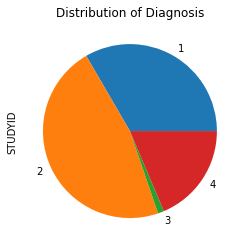

In [250]:
non_genome.groupby(['P1_PT_TYPE']).count()['STUDYID'].plot.pie(y='STUDYID', title='Distribution of Diagnosis')

In [251]:
non_genome.drop(labels=['STUDYID', 'PATID', 'MISC_TARC_PAT_VISIT', 'MISC_SITEID', 'A1_EVENTDATEX'], axis=1, inplace=True)
non_genome

,VISIT,A1_BIRTHYR,AGE,A1_HANDEDNESS,A1_HISPANIC,A1_MARISTAT,A1_RACE,A1_RESIDENC,A1_SEX,A3_DADDEM,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1,1927,80,2,0,1,1.0,1,1,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1,1923,84,2,0,1,5.0,1,1,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,2,1923,85,2,0,1,5.0,1,1,0,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,3,1923,86,2,0,1,5.0,1,1,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,4,1923,87,2,0,1,99.0,1,1,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,1,1944,73,2,1,1,1.0,1,0,0,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,1,1945,72,2,1,2,1.0,1,0,0,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,1,1936,81,2,1,1,1.0,1,1,0,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,1,1954,63,2,1,2,1.0,1,0,0,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [252]:
non_genome.drop(labels=['A1_BIRTHYR'], axis=1, inplace=True)
non_genome

,VISIT,AGE,A1_HANDEDNESS,A1_HISPANIC,A1_MARISTAT,A1_RACE,A1_RESIDENC,A1_SEX,A3_DADDEM,A3_MOMDEM,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1,80,2,0,1,1.0,1,1,0,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1,84,2,0,1,5.0,1,1,0,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,2,85,2,0,1,5.0,1,1,0,1,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,3,86,2,0,1,5.0,1,1,0,1,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,4,87,2,0,1,99.0,1,1,0,1,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,1,73,2,1,1,1.0,1,0,0,0,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,1,72,2,1,2,1.0,1,0,0,0,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,1,81,2,1,1,1.0,1,1,0,0,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,1,63,2,1,2,1.0,1,0,0,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [253]:
non_genome_input = non_genome.drop(labels=['P1_PT_TYPE'], axis=1)
non_genome_output = non_genome['P1_PT_TYPE']

In [254]:
non_genome_input

,VISIT,AGE,A1_HANDEDNESS,A1_HISPANIC,A1_MARISTAT,A1_RACE,A1_RESIDENC,A1_SEX,A3_DADDEM,A3_MOMDEM,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1,80,2,0,1,1.0,1,1,0,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1,84,2,0,1,5.0,1,1,0,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,2,85,2,0,1,5.0,1,1,0,1,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,3,86,2,0,1,5.0,1,1,0,1,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,4,87,2,0,1,99.0,1,1,0,1,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,1,73,2,1,1,1.0,1,0,0,0,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,1,72,2,1,2,1.0,1,0,0,0,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,1,81,2,1,1,1.0,1,1,0,0,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,1,63,2,1,2,1.0,1,0,0,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [255]:
non_genome_output

0        1
1        1
2        1
3        1
4        1
        ..
14650    4
14651    4
14652    4
14653    4
14654    4
Name: P1_PT_TYPE, Length: 14654, dtype: int64

In [256]:
non_genome_input_num = non_genome_input.select_dtypes(include=['number', 'category'])
non_genome_input_num

,VISIT,AGE,A1_HANDEDNESS,A1_HISPANIC,A1_MARISTAT,A1_RACE,A1_RESIDENC,A1_SEX,A3_DADDEM,A3_MOMDEM,...,X2_PHYEST,X2_PHYESTFIRM,Q1_Quanterix,Q1_Quanterix_tp,Q1_YKL_40,Q1_GFAP,Q1_NFL,Q1_Total_tau,Q1_UCHL1,Q1_CD14
0,1,80,2,0,1,1.0,1,1,0,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
1,1,84,2,0,1,5.0,1,1,0,0,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
2,2,85,2,0,1,5.0,1,1,0,1,...,15.5,15.5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
3,3,86,2,0,1,5.0,1,1,0,1,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
4,4,87,2,0,1,99.0,1,1,0,1,...,0.0,0.0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,1,73,2,1,1,1.0,1,0,0,0,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14651,1,72,2,1,2,1.0,1,0,0,0,...,1.0,1.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14652,1,81,2,1,1,1.0,1,1,0,0,...,2.0,2.0,1,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000
14653,1,63,2,1,2,1.0,1,0,0,1,...,3.0,3.0,1,1,60940.173517,65.974213,8.398520,0.305191,41.271858,1160.433


In [257]:
# Kruskal Wallis Test
from scipy import stats 

def kruskal_wallis(input_dataset, output_dataset, p_value=0):
    input_columns = []
    p_values = []
    # Go through each column/feature to perform the Kruskal Wallis Test
    for col in input_dataset.columns:
        feature = input_dataset[col]
        # Calculate Kruskal Wallis test on the column/feature
        # Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
        result = stats.kruskal(list(feature), list(output_dataset))
        # reject null hypothesis if p <= p_value, else fail to reject null hypothesis and accept the column
        if result.pvalue > p_value:
            input_columns.append(col)
            p_values.append(result.pvalue)
    return (input_columns, p_values)

In [259]:
non_genome_kruskal_wallis = kruskal_wallis(non_genome_input_num, non_genome_output, p_value=0)
non_genome_kruskal_wallis

(['A1_HANDEDNESS',
  'A43_ADMEDEVER',
  'A5_PACKSPER',
  'C1_SS_WMS3_LM_I',
  'C1_SS_WMS3_LM_II',
  'C1_TAPS',
  'D1_WHODIDDX',
  'PROTEO_BFGF',
  'PROTEO_GLUCAGON',
  'PROTEO_IL_6_HUMAN',
  'PROTEO_MCP_1_HUMAN',
  'PROTEO_MIP_1A_HUMAN',
  'PROTEO_VEGF_CYTO_PLATE'],
 [9.841625207392082e-69,
  7.177020652113473e-129,
  1.0191730541424064e-14,
  7.679138340278689e-188,
  8.271880334194637e-225,
  2.199922910813718e-158,
  7.376919020308326e-110,
  3.4376358381209665e-30,
  1.2399236420360256e-107,
  4.406360715046822e-88,
  2.295660633515219e-108,
  1.0833821233541531e-68,
  1.6652634475175155e-296])

In [268]:
import matplotlib.pyplot as plt 

def kruskal_wallis_data_visualization(input_columns, column_p_values):
    # Graph a horizontal bar plot which clearly shows the statistically
    # significant columns and their corresponding p-values
    plt.barh(input_columns, column_p_values)
    plt.title("P-Values of Kruskal Wallis Statistically Significant Input Columns")
    plt.xlabel("p-value")
    plt.ylabel("Column")
    plt.show()
    return 

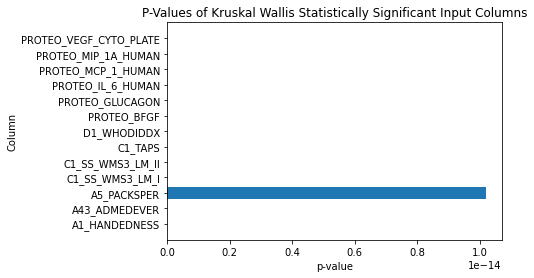

In [269]:
kruskal_wallis_data_visualization(non_genome_kruskal_wallis[0], non_genome_kruskal_wallis[1])

In [127]:
non_genome_input_num[input_columns]

,A1_HANDEDNESS,A43_ADMEDEVER,A5_PACKSPER,C1_SS_WMS3_LM_I,C1_SS_WMS3_LM_II,C1_TAPS,D1_WHODIDDX,PROTEO_BFGF,PROTEO_GLUCAGON,PROTEO_IL_6_HUMAN,PROTEO_MCP_1_HUMAN,PROTEO_MIP_1A_HUMAN,PROTEO_VEGF_CYTO_PLATE
0,2,0,8,-9,-9,0,2,0.00,0.00,0.00,0.00,0.0,0.00
1,2,0,9,-9,-9,0,2,7.11,228.96,12.22,1001.58,-999999.0,669.83
2,2,1,1,-9,-9,0,2,7.11,228.96,12.22,1001.58,-999999.0,669.83
3,2,1,1,-9,-9,0,2,7.11,228.96,12.22,1001.58,-999999.0,669.83
4,2,1,1,-9,-9,0,2,7.11,228.96,12.22,1001.58,-999999.0,669.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,2,2,0,9,7,20,2,0.00,0.00,0.00,0.00,0.0,0.00
14651,2,2,0,5,6,24,2,0.00,0.00,0.00,0.00,0.0,0.00
14652,2,2,0,12,12,26,2,0.00,0.00,0.00,0.00,0.0,0.00
14653,2,2,0,8,12,27,2,0.00,0.00,0.00,0.00,0.0,0.00


In [128]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(non_genome_input_num[input_columns], non_genome_output)
random_forest_model.score(non_genome_input_num[input_columns], non_genome_output)

0.9551658250307083

In [129]:
pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [130]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(non_genome_input_num[input_columns], non_genome_output)
xgb_model.score(non_genome_input_num[input_columns], non_genome_output)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/angelacao/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/angelacao/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [141]:
pip install kmodes


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [142]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

In [145]:
kmode = KModes(n_clusters=4, init='random', n_init=20, verbose=1)
results = kmode.fit_predict(non_genome_input)
results

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2527, cost: 1518025.0
Run 1, iteration: 2/100, moves: 884, cost: 1514083.0
Run 1, iteration: 3/100, moves: 347, cost: 1513835.0
Run 1, iteration: 4/100, moves: 38, cost: 1513831.0
Run 1, iteration: 5/100, moves: 0, cost: 1513831.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2498, cost: 1501672.0
Run 2, iteration: 2/100, moves: 170, cost: 1501655.0
Run 2, iteration: 3/100, moves: 12, cost: 1501655.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3301, cost: 1521404.0
Run 3, iteration: 2/100, moves: 1528, cost: 1515507.0
Run 3, iteration: 3/100, moves: 823, cost: 1512351.0
Run 3, iteration: 4/100, moves: 399, cost: 1511584.0
Run 3, iteration: 5/100, moves: 88, cost: 1511548.0
Run 3, iteration: 6/100, moves: 18, cost: 1511548.0
Init: initializing c

array([2, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [146]:
results

array([2, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [147]:
non_genome_output

0        1
1        1
2        1
3        1
4        1
        ..
14650    4
14651    4
14652    4
14653    4
14654    4
Name: P1_PT_TYPE, Length: 14655, dtype: int64

In [148]:
count_k_modes = {}

for i in range(0, len(results)):
    k_mode_result = results[i]
    actual_output = non_genome_output[i]
    result = (k_mode_result, actual_output)
    if result in count_k_modes:
        count_k_modes[result] += 1
    else:
        count_k_modes[result] = 1 

count_k_modes

{(2, 1): 1285,
 (0, 1): 2683,
 (0, 4): 375,
 (0, 3): 86,
 (2, 4): 296,
 (2, 3): 36,
 (2, 2): 569,
 (0, 2): 1209,
 (1, 2): 1332,
 (3, 2): 3758,
 (3, 4): 1353,
 (3, 3): 28,
 (3, 1): 630,
 (1, 4): 704,
 (1, 1): 294,
 (1, 3): 17}

In [143]:
from sklearn.feature_selection import RFE 
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_rfe = RFE(random_forest_model, 10)
rf_fit = random_forest_rfe.fit(non_genome_input_num, non_genome_output)
print("Num Features: %s" % (rf_fit.n_features_))
print("Selected Features: %s" % (rf_fit.support_))
print("Feature Ranking: %s" % (rf_fit.ranking_))

/Users/angelacao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


KeyboardInterrupt: 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_rfe = RFE(xgb_model, 10)
xgb_fit = xgb_rfe.fit(non_genome_input_num, non_genome_output)
print("Num Features: %s" % (xgb_fit.n_features_))
print("Selected Features: %s" % (xgb_fit.support_))
print("Feature Ranking: %s" % (xgb_fit.ranking_))

### Last Visit Analysis

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
last_visits = non_genome.groupby(by=['PATID']).nth(-1)
last_visits

In [ ]:
ccr_columns = []
for col in last_visits.columns:
    if col.startswith("CCR"):
        ccr_columns.append(col)
ccr_columns

In [ ]:
last_visits.drop(labels=ccr_columns, axis=1, inplace=True)
last_visits

In [ ]:
type_onehot_encode = pd.get_dummies(last_visits['P1_PT_TYPE'])
type_onehot_encode

In [ ]:
last_visits['P1_PT_TYPE']

In [ ]:
type_onehot_encode.iloc[:, 0]

In [ ]:
last_visits['AD_diagnosis'] = type_onehot_encode.iloc[:, 0]
last_visits

In [ ]:
last_visits_count = last_visits.groupby(by=['VISIT']).count()['AD_diagnosis']
last_visits_count

In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(last_visits['AGE'], event_observed=last_visits['AD_diagnosis'])
kmf.plot_survival_function()
plt.title("Kaplan Meier Survival Analysis for Last Visit")
plt.xlabel("Age")
plt.ylabel("Probability of Survival")

In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(last_visits['VISIT'], event_observed=last_visits['AD_diagnosis'])
kmf.plot_survival_function()
plt.title("Kaplan Meier Survival Analysis for Last Visit")
plt.xlabel("Visit")
plt.ylabel("Probability of Survival")

In [ ]:
last_visits_select = last_visits.select_dtypes(include=['number', 'category'])
last_visits_select.drop(['STUDYID'], axis=1, inplace=True)
last_visits_select

In [ ]:
last_visits_select.groupby(by=['VISIT']).mean()

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.0001)
last_visits_justify = last_visits
last_visits_justify['AGE'] = last_visits_justify['AGE'].values.astype(float)
last_visits_justify['AD_diagnosis'] = last_visits_justify['AD_diagnosis'].values.astype(float)
last_visits_justify.drop(labels=['A41_PMBPF', 'A41_PMBPFU', 'A44_SSDFU', 'A44_SSDSU', 'A44_SSEF', 'A44_SSEFU', 'A44_SSEPREV', 'A44_SSES', 'A44_SSESU', 'A44_SSFF', 'A44_SSFFU', 'A44_SSFPREV', 'A44_SSFS', 'A44_SSFSU', 'D1_CORT', 'D1_CORTIF', 'D1_DOWNS', 'D1_DOWNSIF', 'D1_HUNT', 'D1_HUNTIF', 'D1_PRION', 'D1_PRIONIF', 'D1_PSP', 'D1_PSPIF'], axis=1, inplace=True)
last_visits_justify.drop(labels=['STUDYID'], axis=1, inplace=True)
last_visits_justify = last_visits_justify.select_dtypes(include=['number', 'category'])
cph.fit(last_visits_justify.groupby(by=['VISIT']).mean(), 'AGE', event_col='AD_diagnosis')
# cph.summary()
cph.plot()

In [ ]:
cph.predict_survival_function(last_visits_justify.groupby(by=['VISIT']).mean()).plot()
plt.title("Cox Proportional Hazard Survival Analysis for Last Visit")
plt.xlabel("Age")
plt.ylabel("Probability of Survival")

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.0001)
last_visits_justify = last_visits
last_visits_justify['AGE'] = last_visits_justify['AGE'].values.astype(float)
last_visits_justify['AD_diagnosis'] = last_visits_justify['AD_diagnosis'].values.astype(float)
# last_visits_justify.drop(labels=['A41_PMBPF', 'A41_PMBPFU', 'A44_SSDFU', 'A44_SSDSU', 'A44_SSEF', 'A44_SSEFU', 'A44_SSEPREV', 'A44_SSES', 'A44_SSESU', 'A44_SSFF', 'A44_SSFFU', 'A44_SSFPREV', 'A44_SSFS', 'A44_SSFSU', 'D1_CORT', 'D1_CORTIF', 'D1_DOWNS', 'D1_DOWNSIF', 'D1_HUNT', 'D1_HUNTIF', 'D1_PRION', 'D1_PRIONIF', 'D1_PSP', 'D1_PSPIF'], axis=1, inplace=True)
# last_visits_justify.drop(labels=['STUDYID'], axis=1, inplace=True)
last_visits_justify = last_visits_justify.select_dtypes(include=['number', 'category'])
cph.fit(last_visits_justify, 'AGE', event_col='AD_diagnosis')
# cph.summary()
cph.plot()

In [ ]:
cph.predict_survival_function(last_visits_justify).plot()
plt.title("Cox Proportional Hazard Survival Analysis for Last Visit")
plt.xlabel("Age")
plt.ylabel("Probability of Survival")

In [ ]:
cph.predict_survival_function(last_visits_justify.iloc[0:20]).plot()
plt.title("Cox Proportional Hazard Survival Analysis for Last Visit for first 20 patients")
plt.xlabel("Age")
plt.ylabel("Probability of Survival")

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.0001)
last_visits_justify = last_visits
last_visits_justify['VISIT'] = last_visits_justify['VISIT'].values.astype(float)
last_visits_justify['AD_diagnosis'] = last_visits_justify['AD_diagnosis'].values.astype(float)
# last_visits_justify.drop(labels=['A41_PMBPF', 'A41_PMBPFU', 'A44_SSDFU', 'A44_SSDSU', 'A44_SSEF', 'A44_SSEFU', 'A44_SSEPREV', 'A44_SSES', 'A44_SSESU', 'A44_SSFF', 'A44_SSFFU', 'A44_SSFPREV', 'A44_SSFS', 'A44_SSFSU', 'D1_CORT', 'D1_CORTIF', 'D1_DOWNS', 'D1_DOWNSIF', 'D1_HUNT', 'D1_HUNTIF', 'D1_PRION', 'D1_PRIONIF', 'D1_PSP', 'D1_PSPIF'], axis=1, inplace=True)
# last_visits_justify.drop(labels=['STUDYID'], axis=1, inplace=True)
last_visits_justify = last_visits_justify.select_dtypes(include=['number', 'category'])
cph.fit(last_visits_justify, 'VISIT', event_col='AD_diagnosis')
# cph.summary()
cph.plot()

In [ ]:
cph.predict_survival_function(last_visits_justify).plot()
plt.title("Cox Proportional Hazard Survival Analysis for Last Visit")
plt.xlabel("Visit")
plt.ylabel("Probability of Survival")

In [ ]:
cph.predict_survival_function(last_visits_justify[0:20]).plot()
plt.title("Cox Proportional Hazard Survival Analysis for Last Visit for first 20 patients")
plt.xlabel("Visit")
plt.ylabel("Probability of Survival")

## Genomic Data

In [ ]:
bed = 'TARC_MEGA_06012017_raw_Cauc_MEGA.bed'
bim = 'TARC_MEGA_06012017_raw_Cauc_MEGA.bim'
fam = 'TARC_MEGA_06012017_raw_Cauc_MEGA.fam'

from pandas_plink import read_plink1_bin
from pandas_plink import read_plink
genetic = read_plink1_bin(bed, bim, fam, verbose=False)
genetic

In [ ]:
import xarray

df_genetic = xarray.DataArray.to_dataframe(genetic)
df_genetic[0:20]